In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
import datetime as dt
from time import time
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

About Dataset

General Information:

This dataset contains NDVI (Normalized Difference Vegetation Index) data from Ukraine from Jan 2018-Jan 2023 (5 years of data). These NDVI readings were collected from the Sentinel-2 satellite constellation and compiled using the Sentinel Hub EO Browser.

NDVI readings range from -1 to 1. A reading <0 indicates areas of water, cloud cover, or manmade structures. In this dataset, a negative reading most likely signifies cloud cover as the area of interest encompasses the entirety of Ukraine. A reading >0 but close to 0 signifies barren land with little vegetation, while readings >0 and closer to 1 signify dense green vegetation.

The dataset includes both mean NDVI readings and other information related to the index. The data was collected from multiple NDVI scans every day from Jan 31, 2018 - Jan 31, 2023, ~1800 days of data total. for the day total.

In [2]:
df=pd.read_csv('input/NDVI_Data.csv', delimiter=",")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   C0/date                  1828 non-null   object 
 1   C0/min                   1828 non-null   float64
 2   C0/max                   1828 non-null   float64
 3   C0/mean                  1828 non-null   float64
 4   C0/stDev                 1828 non-null   float64
 5   C0/sampleCount           1828 non-null   int64  
 6   C0/noDataCount           1828 non-null   int64  
 7   C0/median                1828 non-null   float64
 8   C0/p10                   1828 non-null   float64
 9   C0/p90                   1828 non-null   float64
 10  C0/cloudCoveragePercent  1828 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 157.2+ KB


In [4]:
df.head()

,C0/date,C0/min,C0/max,C0/mean,C0/stDev,C0/sampleCount,C0/noDataCount,C0/median,C0/p10,C0/p90,C0/cloudCoveragePercent
0,2018-01-31T00:00:00.000Z,-1.000000,1.000000,0.084325,0.148261,1244672,1079992,0.033008,-0.001581,0.253759,75.986762
1,2018-02-01T00:00:00.000Z,-1.000000,1.000000,0.095616,0.197961,1244672,1005113,0.024652,-0.017838,0.371078,38.878523
2,2018-02-02T00:00:00.000Z,-1.000000,1.000000,0.030553,0.069774,1244672,1089922,0.022627,-0.013245,0.069010,93.985137
3,2018-02-03T00:00:00.000Z,-1.000000,0.789233,0.050304,0.176424,1244672,1240006,0.002996,-0.068551,0.288719,75.996571
4,2018-02-04T00:00:00.000Z,-0.475676,0.989041,0.022073,0.064476,1244672,1208253,0.015905,-0.024599,0.050778,97.119635


In [5]:
i = 0
for d in df['C0/date'].values:
    df['C0/date'].values[i] = d[0:10]
    i+=1
df

,C0/date,C0/min,C0/max,C0/mean,C0/stDev,C0/sampleCount,C0/noDataCount,C0/median,C0/p10,C0/p90,C0/cloudCoveragePercent
0,2018-01-31,-1.000000,1.000000,0.084325,0.148261,1244672,1079992,0.033008,-0.001581,0.253759,75.986762
1,2018-02-01,-1.000000,1.000000,0.095616,0.197961,1244672,1005113,0.024652,-0.017838,0.371078,38.878523
2,2018-02-02,-1.000000,1.000000,0.030553,0.069774,1244672,1089922,0.022627,-0.013245,0.069010,93.985137
3,2018-02-03,-1.000000,0.789233,0.050304,0.176424,1244672,1240006,0.002996,-0.068551,0.288719,75.996571
4,2018-02-04,-0.475676,0.989041,0.022073,0.064476,1244672,1208253,0.015905,-0.024599,0.050778,97.119635
...,...,...,...,...,...,...,...,...,...,...,...
1823,2023-01-27,-1.000000,1.000000,0.019748,0.028369,1244672,1016871,0.018514,-0.006442,0.043279,99.259880
1824,2023-01-28,-1.000000,1.000000,0.063229,0.098297,1244672,993707,0.030371,0.004475,0.171863,87.114139
1825,2023-01-29,-1.000000,1.000000,0.036623,0.071935,1244672,1004990,0.015616,-0.005761,0.093817,91.071920
1826,2023-01-30,-0.194219,1.000000,0.029366,0.042460,1244672,1067490,0.021226,0.006672,0.047481,98.845255


In [6]:
df.head()

,C0/date,C0/min,C0/max,C0/mean,C0/stDev,C0/sampleCount,C0/noDataCount,C0/median,C0/p10,C0/p90,C0/cloudCoveragePercent
0,2018-01-31,-1.000000,1.000000,0.084325,0.148261,1244672,1079992,0.033008,-0.001581,0.253759,75.986762
1,2018-02-01,-1.000000,1.000000,0.095616,0.197961,1244672,1005113,0.024652,-0.017838,0.371078,38.878523
2,2018-02-02,-1.000000,1.000000,0.030553,0.069774,1244672,1089922,0.022627,-0.013245,0.069010,93.985137
3,2018-02-03,-1.000000,0.789233,0.050304,0.176424,1244672,1240006,0.002996,-0.068551,0.288719,75.996571
4,2018-02-04,-0.475676,0.989041,0.022073,0.064476,1244672,1208253,0.015905,-0.024599,0.050778,97.119635


In [7]:
df.index = pd.to_datetime(df['C0/date'], format='%Y-%m-%d')

In [8]:
df = df.drop('C0/date', axis=1)
df = df.drop('C0/sampleCount', axis=1)
df = df.drop('C0/noDataCount', axis=1)

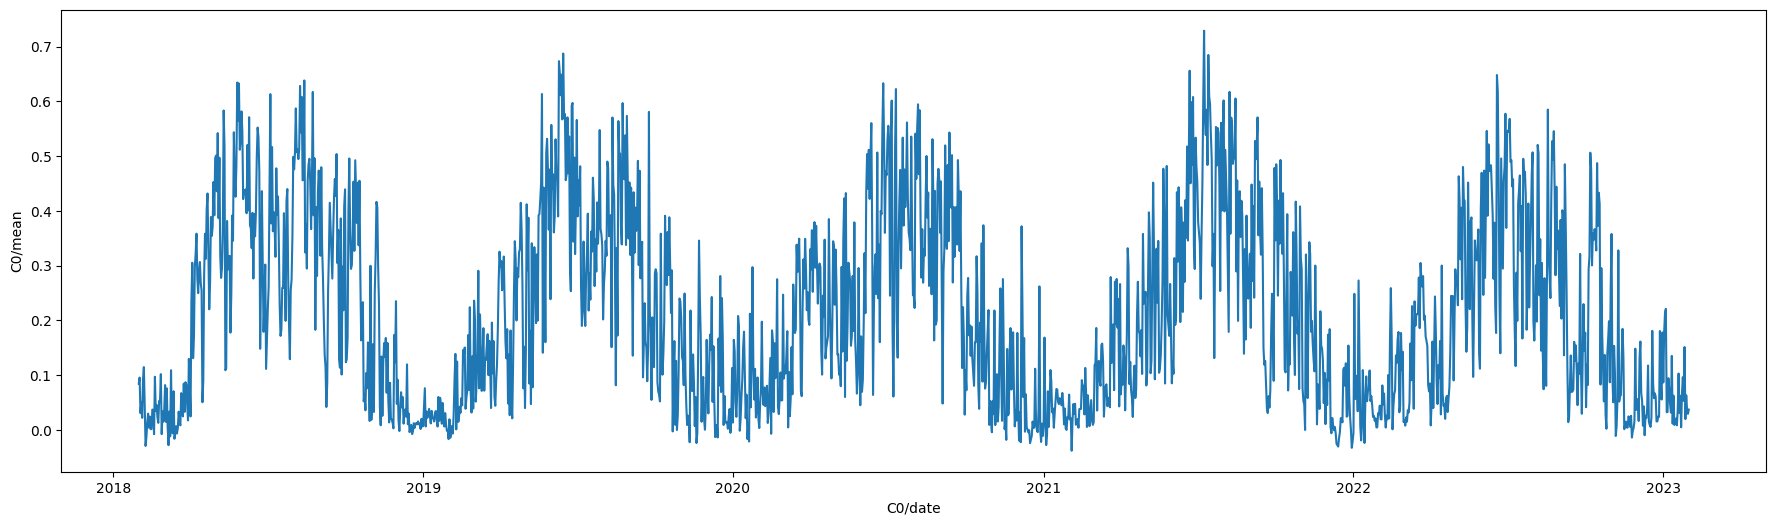

In [9]:
plt.figure(figsize=(22,6))
sns.lineplot(x=df.index, y=df['C0/mean'])
plt.show()

In [10]:
train = df[:-365].copy()
test = df[-365:].copy()


In [11]:

X_train = train.drop('C0/mean', axis=1)
y_train = train['C0/mean']
X_test = test.drop('C0/mean', axis=1)
y_test = test['C0/mean']

In [12]:
start = time()
model.fit(X_train, y_train)
train_time = time() - start
start = time()
y_pred = model.predict(X_test)
predict_time = time()-start    
print(model)
print("\tTraining time: %0.3fs" % train_time)
print("\tPrediction time: %0.3fs" % predict_time)
print("\tMean squared error:", mean_squared_error(y_test, y_pred))
print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
print("\tMAPE percentage:", mean_absolute_percentage_error(y_test, y_pred))
print("\tR2 score:", r2_score(y_test, y_pred))
print()


RandomForestRegressor()
	Training time: 3.628s
	Prediction time: 0.017s
	Mean squared error: 0.00011564586793777583
	Mean absolute error: 0.007047839898566437
	MAPE percentage: 0.1003506890694031
	R2 score: 0.9956314317033588



In [13]:
df_final = pd.DataFrame(data={'Actuals':y_test, 'Predictions':y_pred}, index=y_test.index)  
df_final.head()

,Actuals,Predictions
C0/date,,
2022-02-03,0.019083,0.019823
2022-02-04,0.081249,0.076569
2022-02-05,0.046621,0.049802
2022-02-06,0.066547,0.086986
2022-02-07,0.026573,0.028892


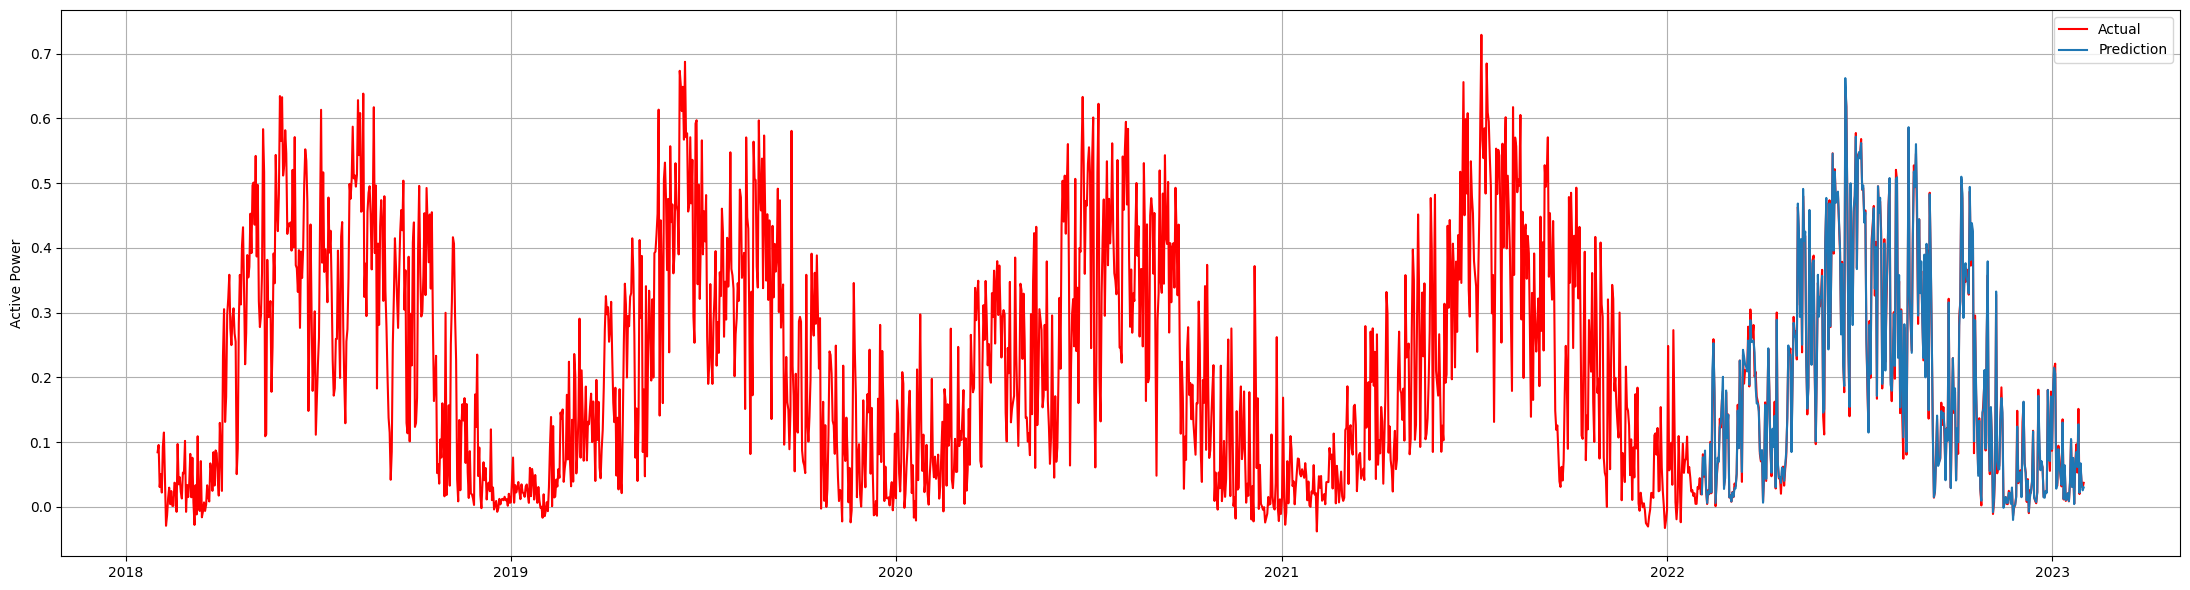

In [14]:
plt.figure(figsize=(22,6))
plt.plot(df['C0/mean'], color='red',label='Actual')
plt.plot(df_final['Predictions'],label='Prediction')
plt.ylabel('Active Power')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

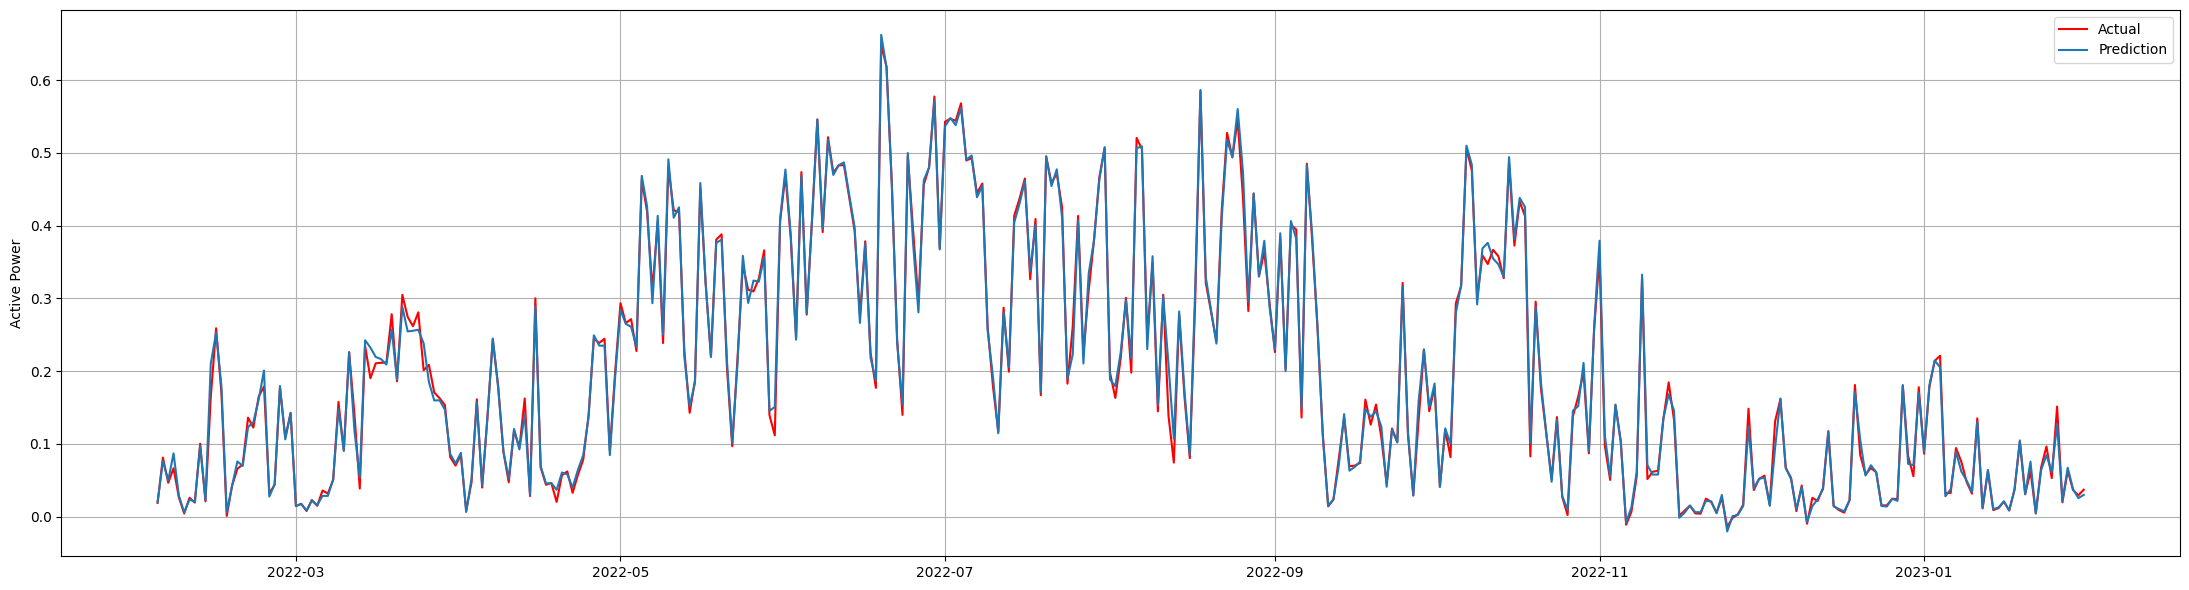

In [15]:
plt.figure(figsize=(22,6))
plt.plot(df_final['Actuals'], color='red',label='Actual')
plt.plot(df_final['Predictions'],label='Prediction')
plt.ylabel('Active Power')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()